In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# One normal distribution

In [20]:
mu, sigma = 0, 1 # mean and standard deviation
data = np.random.normal(mu, sigma, 10000)

In [21]:
len(data), data[:10]

(10000, array([ 0.01382665, -0.68536872, -0.49202229,  0.78851249, -0.1208097 ,
         0.82781036,  0.58423276,  2.1648338 , -0.84157878,  0.50994329]))

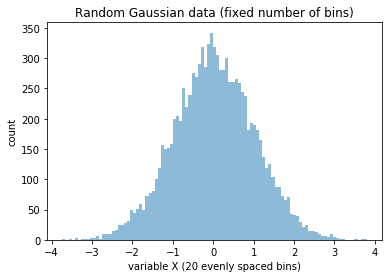

In [22]:
bins = np.linspace(min(data), max(data), 100) # fixed number of bins
plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed number of bins)')
plt.xlabel('variable X (20 evenly spaced bins)')
plt.ylabel('count')

plt.show()

# 2 separate normal distributions

In [23]:
mu, sigma = -1, 0.2 # mean and standard deviation
data1 = np.random.normal(mu, sigma, 10000)
mu, sigma = 5, 0.5 # mean and standard deviation
data2 = np.random.normal(mu, sigma, 10000)
data = np.vstack((data1[:, None], data2[:, None]))

In [24]:
data=data[:,0]

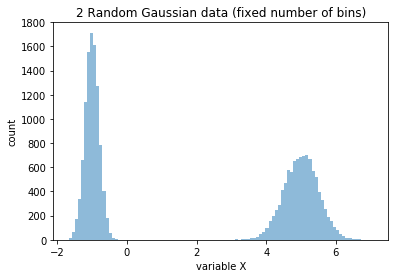

In [27]:
bins = np.linspace(min(data), max(data), 100) # fixed number of bins
plt.hist(data, bins=bins, alpha=0.5)
plt.title('2 Random Gaussian data (fixed number of bins)')
plt.xlabel('variable X')
plt.ylabel('count')

plt.show()

# Find the parameters of these 2 normal ditributions

In [29]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=2, covariance_type='full')
model.fit(data[:,None])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [30]:
model.converged_

True

In [32]:
# Find means of these 2 distributions
model.means_

array([[-1.00299647],
       [ 5.00315102]])

In [74]:
model.precisions_

array([[[25.11259092]],

       [[ 3.98229009]]])

In [75]:
model.weights_

array([0.5, 0.5])

In [36]:
model.covariances_

array([[[0.04085535]],

       [[0.24716855]]])

In [81]:
model.covariance_type

'full'

In [35]:
# Find standard deviation
cov = model.covariances_
[np.sqrt(np.trace(cov[i])) for i in range(0,2) ]

[0.2021270563376936, 0.4971604920017472]

# 2D distributions

In [37]:
mean, cov = [-1, -5], [[0.2, 0.1],[0.1, 0.2]] # mean and standard deviation
data1 = np.random.multivariate_normal(mean, cov, 10000)

In [38]:
x, y = data1.T

In [53]:
x.shape, y.shape

((10000,), (10000,))

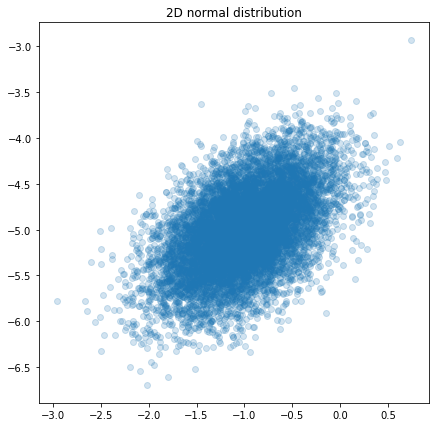

In [44]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x, y, alpha=0.2)
ax.set_title('2D normal distribution')
plt.show;

In [54]:
# https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-3.3261780461141655 1.1060911888358205 -7.06960446714236 -2.557940897051753


In [61]:
xx.shape, yy.shape

((100, 100), (100, 100))

In [60]:
import scipy.stats as st
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

In [63]:
f.shape, f[:5,:5]

((100, 100),
 array([[1.62854053e-22, 1.16113152e-21, 6.12983377e-21, 2.39615828e-20,
         6.93639024e-20],
        [2.54236257e-21, 2.10513892e-20, 1.29064275e-19, 5.85899414e-19,
         1.96952855e-18],
        [2.97715743e-20, 2.86289814e-19, 2.03840472e-18, 1.07463700e-17,
         4.19507283e-17],
        [2.61511916e-19, 2.92049611e-18, 2.41491125e-17, 1.47852743e-16,
         6.70276711e-16],
        [1.72308584e-18, 2.23477026e-17, 2.14604058e-16, 1.52589470e-15,
         8.03343625e-15]]))

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

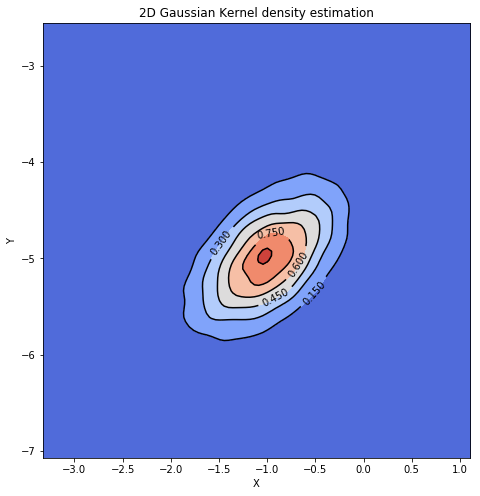

In [64]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

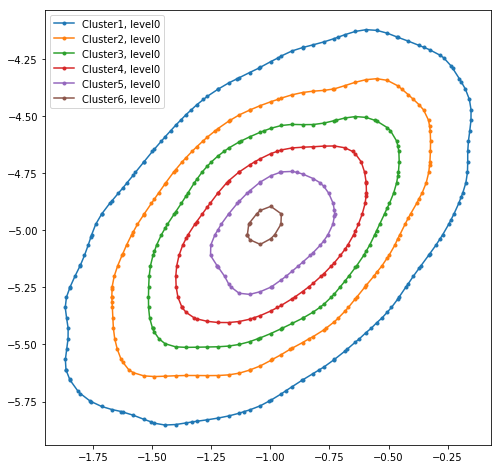

In [65]:
plt.figure(figsize=(8,8))
for j in range(len(cset.allsegs)):
    for ii, seg in enumerate(cset.allsegs[j]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=f'Cluster{j}, level{ii}')
plt.legend()

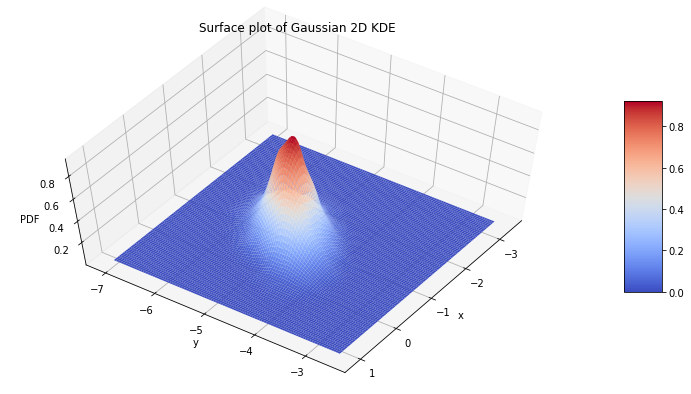

In [66]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

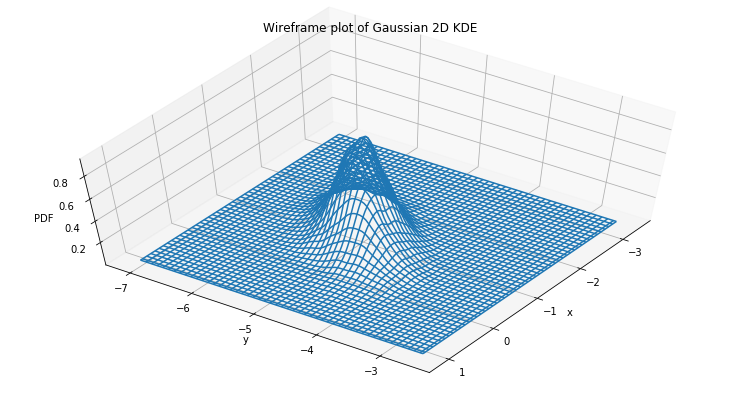

In [68]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
w = ax.plot_wireframe(xx, yy, f)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Wireframe plot of Gaussian 2D KDE');
ax.view_init(60, 35)

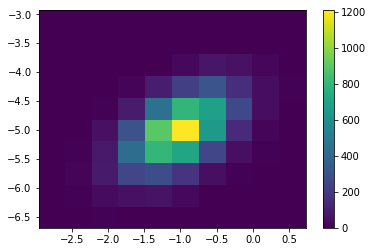

In [69]:
h =plt.hist2d(x, y)
plt.colorbar(h[3])

# 2 2D normal distributions

In [81]:
mean, cov = [5, 0], [[2, 0.1],[0.1, 2]] # mean and standard deviation
data1 = np.random.multivariate_normal(mean, cov, 10000)

mean, cov = [-1, -5], [[0.2, 0.1],[0.1, 0.2]] # mean and standard deviation
data2 = np.random.multivariate_normal(mean, cov, 10000)

In [82]:
data1.shape, data2.shape

((10000, 2), (10000, 2))

In [83]:
data = np.vstack((data1, data2))
data.shape

(20000, 2)

In [84]:
x, y = data.T

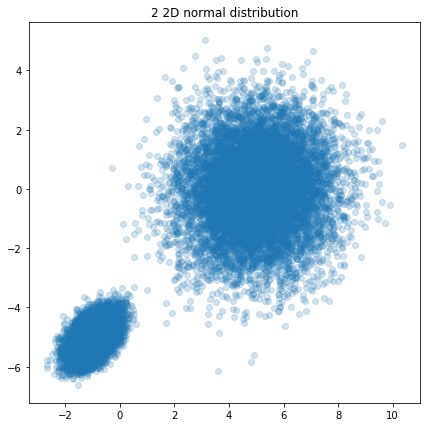

In [85]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x, y, alpha=0.2)
ax.set_title('2 2D normal distribution')
plt.show;

In [87]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=2, covariance_type='full')
model.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [88]:
# Find means of these 2 distributions
model.means_

array([[ 5.00030198, -0.02643929],
       [-0.9963821 , -4.99838923]])

In [105]:
model.covariances_

array([[[1.96814494, 0.09432395],
        [0.09432395, 1.9770764 ]],

       [[0.20063583, 0.09874105],
        [0.09874105, 0.19747031]]])

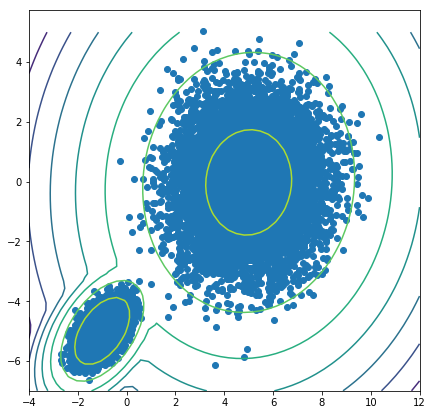

In [137]:
X, Y = np.meshgrid(np.linspace(-4, 12), np.linspace(-7,5))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = model.score_samples(XX)
Z = Z.reshape((50,50))

fig = plt.figure(figsize=(7, 7))
plt.contour(X, Y, Z)
plt.scatter(x, y)
 
plt.show()